In [1]:
import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
images_train.shape

(50000, 32, 32, 3)

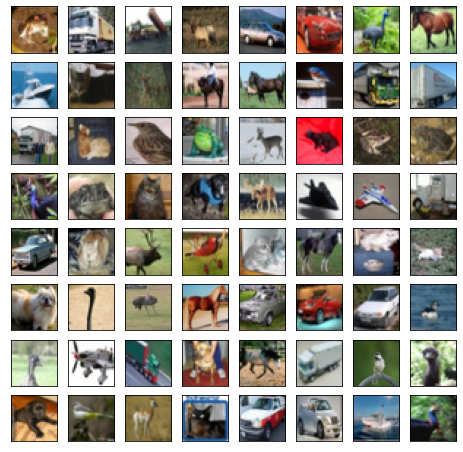

In [7]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)            # Subplot
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.imshow(images_train[i],cmap = plt.cm.bone)
plt.show()

In [8]:
x_train= images_train.reshape((50000,3072))

In [9]:
x_test= images_test.reshape((10000, 3072))

In [10]:
pca= PCA()
pca.fit(x_train)

PCA()

In [11]:
pca.components_.shape

(3072, 3072)

In [12]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.99:
    currentSum += pca.explained_variance_[k]
    k =k + 1
k

658

In [13]:
pca = PCA(n_components = k, whiten = True)
x_train_pca = pca.fit_transform(x_train)
x_train_pca.shape

(50000, 658)

In [14]:
x_test_pca= pca.transform(x_test)

In [15]:
from sklearn import ensemble
rf= ensemble.RandomForestClassifier()
rf.fit(x_train_pca, cls_train)
y_pred= rf.predict(x_test_pca)
print(classification_report(cls_test, y_pred))
print(confusion_matrix(cls_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.49      0.46      1000
           1       0.42      0.50      0.46      1000
           2       0.28      0.26      0.27      1000
           3       0.25      0.24      0.25      1000
           4       0.37      0.35      0.36      1000
           5       0.30      0.28      0.29      1000
           6       0.43      0.44      0.43      1000
           7       0.41      0.33      0.36      1000
           8       0.47      0.54      0.50      1000
           9       0.40      0.41      0.40      1000

    accuracy                           0.38     10000
   macro avg       0.38      0.38      0.38     10000
weighted avg       0.38      0.38      0.38     10000

[[487  55  59  39  31  35  19  34 179  62]
 [ 46 499  19  36  20  48  33  39  77 183]
 [115  36 257  99 150  81 108  63  47  44]
 [ 61  60 108 241  71 190  90  71  46  62]
 [ 77  27 157  82 348  47 133  62  44  23]
 [ 51  63  94 202  80 280 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train_pca, cls_train)
clf.score(x_test_pca, cls_test)

0.1446

In [17]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train_pca, cls_train)
clf.score(x_test_pca, cls_test)

0.4851

In [18]:
y_pred= clf.predict(x_test_pca)

In [23]:
y_pred.shape

(10000,)

In [22]:
dic= {}
for i in range(10):
    dic[i]= class_names[i]
dic

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [27]:
y_pred_in_classnames= np.vectorize(dic.get)(y_pred)

In [30]:
y_pred_in_classnames.shape

(10000,)

In [35]:
np.savetxt("cifar10.csv", y_pred_in_classnames, fmt="%s", delimiter= ',')